In [2]:
from pytrends.request import TrendReq
import pandas as pd
import time

# Define medical symptoms to search (limit to 5 per request)
symptoms1 = ["itching", "skin rash", "continuous sneezing", "shivering", "chills"]

symptoms2 = ["headache", "vomiting", "cough", "fever", "muscle pain"]





# Get global data (no specific region, so we set geo='')
# def top_5_global():
#     global_interest = get_symptom_data('')
#     print("Top 5 most searched symptoms globally:")
#     top_5_global = global_interest.head(5)
#     print(top_5_global)
#     return top_5_global

# Get data by Indian states after building the payload
# def get_region_interest():
#     pytrends = TrendReq(hl='en-US', tz=360)
#     pytrends.build_payload(symptoms1, cat=0, timeframe='today 1-m', geo='IN', gprop='')
#     region_interest = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)
#     return region_interest

# Print top 5 symptoms globally
# top_5_global()

# Print symptom interest by Indian states
# region_interest = get_region_interest()
# print("\nSymptom interest by Indian states:")
# print(region_interest.head())  # Adjust .head() to view more regions if needed


In [3]:
# Function to get data for a specific region (e.g., 'IN' for India or '' for global)
def get_symptom_data(region_code, symptoms):
    # Refresh the session to avoid cache issues
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(symptoms, cat=0, timeframe='today 1-m', geo=region_code, gprop='')
    symptom_data = pytrends.interest_over_time()
    # Remove 'isPartial' column if exists
    symptom_data = symptom_data.drop(columns=['isPartial'], errors='ignore')
    # Sum up search values over time to get the total interest for each symptom
    total_interest = symptom_data.sum().sort_values(ascending=False)
    return total_interest


In [9]:
# Get data for India (by Indian states)
def top_10_indian():
    india_interest1 = get_symptom_data('IN', symptoms=symptoms1)
    time.sleep(5)  # Add delay between requests
    india_interest2 = get_symptom_data('IN', symptoms=symptoms2)
    print("Top 10 most searched symptoms in India:")
    top_10_india = pd.concat([india_interest1, india_interest2]).sort_values(ascending=False).head(10)
    plt=top_10_india.plot(kind='bar')
    print(plt)

    return top_10_india

C:\Users\Srinjoy Roy\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Top 10 most searched symptoms in India:
Axes(0.125,0.11;0.775x0.77)


C:\Users\Srinjoy Roy\AppData\Roaming\Python\Python312\site-packages\pytrends\request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


itching                2838
fever                  2797
cough                  1400
headache                781
vomiting                445
shivering               360
chills                  217
skin rash               176
muscle pain             152
continuous sneezing       4
dtype: int64

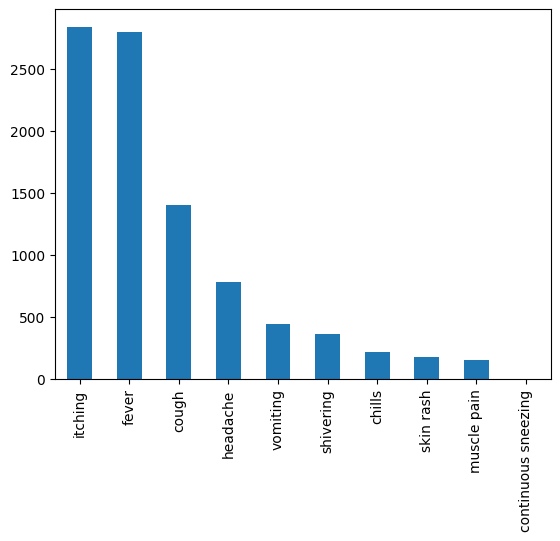

In [10]:
top_10_indian()